# Python数据分析第一次作业
根据题目要求，完成对共享单车数据的分析   
数据文件为在压缩包"citibike-tripdata.csv.zip"中，需要自行解压后进行处理。

## 1.读取数据，并显示前10行。（0.5分）

In [104]:
import pandas as pd

data = pd.read_csv("/content/citibike-tripdata.csv")
data.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.72,-73.96,3107,Bedford Ave & Nassau Ave,40.72,-73.95,14744,Subscriber,1986.00,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.73,-73.99,3425,2 Ave & E 104 St,40.79,-73.94,19587,Subscriber,1981.00,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.69,-73.99,3397,Court St & Nelson St,40.68,-74.00,27937,Subscriber,1984.00,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.72,-73.96,398,Atlantic Ave & Furman St,40.69,-74.00,26066,Subscriber,1985.00,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.72,-73.96,398,Atlantic Ave & Furman St,40.69,-74.00,29408,Subscriber,1982.00,2
5,545,2017-07-01 00:00:18,2017-07-01 00:09:24,361,Allen St & Hester St,40.72,-73.99,502,Henry St & Grand St,40.71,-73.98,21203,Subscriber,1954.00,2
6,1496,2017-07-01 00:00:18,2017-07-01 00:25:15,3233,E 48 St & 5 Ave,40.76,-73.98,546,E 30 St & Park Ave S,40.74,-73.98,15933,Customer,1971.00,1
7,1495,2017-07-01 00:00:19,2017-07-01 00:25:15,3233,E 48 St & 5 Ave,40.76,-73.98,546,E 30 St & Park Ave S,40.74,-73.98,18515,Customer,1964.00,2
8,593,2017-07-01 00:00:27,2017-07-01 00:10:20,3314,W 95 St & Broadway,40.79,-73.97,3363,E 102 St & Park Ave,40.79,-73.95,29135,Subscriber,1982.00,1
9,1950,2017-07-01 00:00:30,2017-07-01 00:33:00,3085,Roebling St & N 4 St,40.71,-73.96,468,Broadway & W 56 St,40.77,-73.98,17365,Subscriber,1983.00,1


## 2. 检查每个字段是否有缺失值，统计各字段缺失值比例，并将数值转化为百分比形式，保留两位小数，如9.99%；最后用平均数或众数填充。（0.5分）
(注意填充时一定要符合具体含义)

In [105]:
# 检查
# NaN only in birth year
print("检查\n", data.isnull().sum())

# 比例
print("比例\n", data["birth year"].isnull().sum() / len(data["birth year"]))

# 百分比
print("百分比\n", round(data["birth year"].isnull().sum() / len(data["birth year"]) * 100, 2), "%")

# 填充
data["birth year"].fillna(data["birth year"].mean(), inplace=True)
print("新比例\n", data["birth year"].isnull().sum() / len(data["birth year"]))

检查
 tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 228596
gender                          0
dtype: int64
比例
 0.13171014733241954
百分比
 13.17 %
新比例
 0.0


## 3. 计算骑行时间(tripduration)字段的基本统计量，包括最大值、最小值、均值、方差及各个四分位数等。（0.5分）

In [106]:
pd.options.display.float_format = '{:.2f}'.format

# 基本统计量
print("基本统计量\n", data["tripduration"].describe())

# 方差
print("方差\n", round(data["tripduration"].var(), 2))

基本统计量
 count   1735599.00
mean       1060.14
std        9622.46
min          61.00
25%         395.00
50%         676.00
75%        1183.00
max     2477222.00
Name: tripduration, dtype: float64
方差
 92591672.13


## 4. 统计骑行时间大于等于3天的记录个数，并将相应记录从原DataFrame中剔除。（0.5分）
骑行时间(tripduration)字段的单位为秒

In [107]:
# 统计
print("统计\n", data.loc[data["tripduration"] >= 60*60*24*3]["tripduration"].count())

# 剔除
data.drop(data.loc[data["tripduration"] >= 60*60*24*3].index, inplace=True)

统计
 235


## 5. 检查站点id和站点name是否一一对应。如果有id相同name不同，或id不同name相同的，将这些记录从数据中剔除。（0.5分）

In [127]:
sub_start = data[["start station id", "start station name"]]
sub_end = data[["end station id", "end station name"]].rename(columns={"end station id": "start station id", 
                                                                       "end station name": "start station name"})
# 是否单射
print(pd.concat([sub_start, sub_end]).groupby(["start station id"]).nunique().value_counts())
print(pd.concat([sub_start, sub_end]).groupby(["start station name"]).nunique().value_counts())

# 没有相同+不同的

start station name
1                     634
dtype: int64
start station id
1                   634
dtype: int64


## 6. 根据bikeid字段统计在数据中有多少辆不同的自行车。（0.5分）

In [128]:
print("不同的自行车\n", data['bikeid'].nunique())

不同的自行车
 10422


## 7. 统计每辆自行车的骑行次数、总骑行时间、平均每次骑行时间、到过（出发或结束）的站点个数。（1.5分）
生成以bikeid为index、指标为columns的DataFrame

In [130]:
# 骑行次数

subdata = data.groupby(["bikeid"]).agg({'tripduration':['count', 'sum', 'mean'], 
                                        'start station id':'count',
                                        })
subdata.head(10)

tripduration                 start station id
              count     sum    mean            count
bikeid                                              
14529           104  201587 1938.34              104
14530           153  110876  724.68              153
14531           180  163721  909.56              180
14532            58   73186 1261.83               58
14533           195  173172  888.06              195
14534           176  160478  911.81              176
14535           174  155612  894.32              174
14536           172  193246 1123.52              172
14537           163  153934  944.38              163
14539           158  196166 1241.56              158

## 8. 统计出发站点、结束站点的个数，并考察两类站点的集合是否相等。（1分）

In [100]:
# 不一样 - 好像有更多结束站
# 可能是因为有客户把自行车放在一个很隔离的站点；然后没有人从哪里开始
print("统计\n", data['start station id'].nunique(), data['end station id'].nunique())

统计
 623 634


## 9. 统计以各站点作为起始站点和结束站点的行程数，并找到出发行程最多的前三个站点的id和name，和结束行程最多的前三个站点的id和name。（1分）

In [136]:
print("起始站点\n", data.groupby(["start station id", "start station name"]).size().reset_index().sort_values(by=0, ascending=False)[:3])

print("\n结束站点\n", data.groupby(["end station id", "end station name"]).size().reset_index().sort_values(by=0, ascending=False)[:3])

起始站点
      start station id     start station name      0
264               519  Pershing Square North  14853
184               426  West St & Chambers St  14118
259               514       12 Ave & W 40 St  12263

结束站点
      end station id       end station name      0
184             426  West St & Chambers St  14795
264             519  Pershing Square North  14469
259             514       12 Ave & W 40 St  12690


## 10. 统计每天7:00-9:00最繁忙（出发和结束行程最多）的3个站点。（1分）
（包括起始行程和结束行程）

In [137]:
sub_start = data.loc[(pd.to_datetime(data['starttime']).dt.time >= pd.to_datetime("07:00:00").time()) & \
                   (pd.to_datetime(data['starttime']).dt.time <= pd.to_datetime("09:00:00").time())]
sub_end = data.loc[(pd.to_datetime(data['stoptime']).dt.time >= pd.to_datetime("07:00:00").time()) & \
                   (pd.to_datetime(data['stoptime']).dt.time <= pd.to_datetime("09:00:00").time())]
         
sub_start = sub_start.groupby(["start station id", "start station name"]).agg({'tripduration':'count'}).reset_index()
sub_end = sub_end.groupby(["end station id", "end station name"]).agg({'tripduration':'count'}).reset_index()

sub_start.rename(columns={"start station id": "id", "start station name": "name", "tripduration": "start_count"}, inplace=True)
sub_end.rename(columns={"end station id": "id", "end station name": "name", "tripduration": "end_count"}, inplace=True)

sub_data = pd.concat([sub_start, sub_end]).groupby(['id', 'name']).sum().reset_index()
sub_data["total_count"] = sub_data["start_count"] + sub_data["end_count"]

# 最繁忙
sub_data.sort_values(by="total_count", ascending=False)[:3]

,id,name,start_count,end_count,total_count
264,519,Pershing Square North,2453.00,2445.00,4898.00
128,359,E 47 St & Park Ave,1009.00,2987.00,3996.00
184,426,West St & Chambers St,1078.00,1861.00,2939.00


## 11. 统计每天17:00-19:00最繁忙的3条（有向）路线。（1分）
（A->B与B->A算作两条不同路线）

In [144]:
sub_data = data.loc[(pd.to_datetime(data['stoptime']).dt.time >= pd.to_datetime("17:00:00").time()) & \
                   (pd.to_datetime(data['starttime']).dt.time <= pd.to_datetime("19:00:00").time())]

# 最繁忙
print("允许A=B:\n", sub_data.groupby(["start station id", "end station id"]).agg({'tripduration':'count'}).reset_index() \
      .rename({"tripduration": "count"}, axis=1).sort_values(by="count", ascending=False)[:3])

print("\nA!=B:\n", sub_data.loc[sub_data["start station id"] != sub_data["end station id"]].groupby(["start station id", "end station id"]) \
      .agg({'tripduration':'count'}).reset_index().rename({"tripduration": "count"}, axis=1).sort_values(by="count", ascending=False)[:3])

允许A=B:
        start station id  end station id  count
70617              3182            3182    242
11596               281             281    235
70618              3182            3254    234

A!=B:
        start station id  end station id  count
70205              3182            3254    234
32813               426             514    195
72564              3254            3182    185


## 12. 统计usertype的中用户类型个数，并分析每类用户在骑行时长、每天骑行时间段上的差异（1.5分）

统计
 Subscriber    1473887
Customer       261712
Name: usertype, dtype: int64

时长分析
            tripduration                             
                   mean median      max min    count
usertype                                            
Customer        2215.59   1293  2477222  61   261712
Subscriber       854.98    603  1604573  61  1473887

差异分析



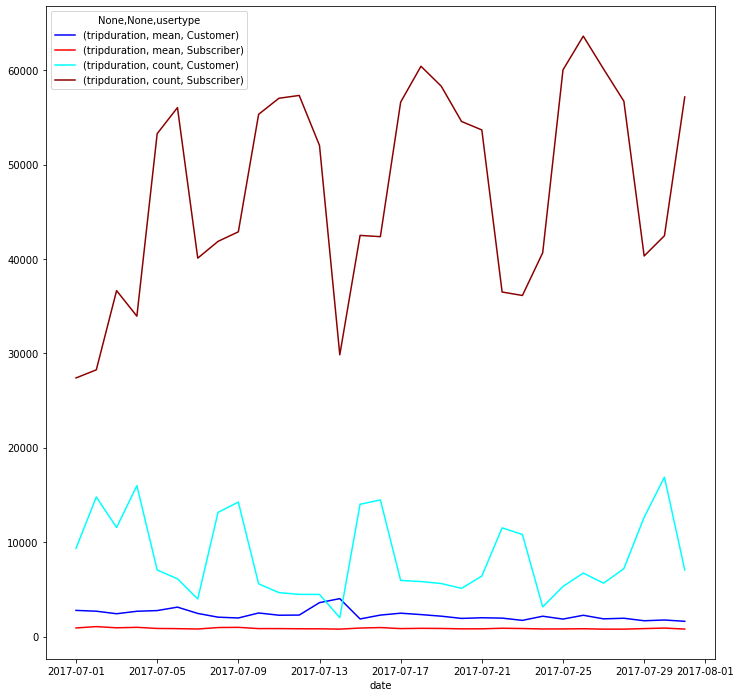

In [98]:
# 这个不包括骑大于一次的客户，因为我们没有一种userid
print("统计\n", data["usertype"].value_counts())

# 时长分析
print("\n时长分析\n", data.groupby(["usertype"]).agg({'tripduration':['mean', 'median', 'max', 'min', 'count']}))

# 差异
print("\n差异分析\n")
data["date"] = pd.to_datetime(data['starttime']).dt.date
subdata = data.groupby(["date", "usertype"]).agg({'tripduration':['mean', 'count']})
subdata.unstack(level=1).plot(figsize=(12, 12), color=['blue', 'red', 'cyan', 'darkred'])